In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import calendar
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import Normalize

In [44]:
data=pd.read_csv("D:\Spring 2024\Social data analysis and visualization\Week one\Police_Department.csv")

In [45]:
data.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,11/22/2004,17:50,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5118535807021,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,10/18/2005,20:00,PARK,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4018830907021,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11014543126030,110145431,26030,ARSON,ARSON,Friday,02/18/2011,05:27,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,94.0
4,10108108004134,101081080,4134,ASSAULT,BATTERY,Sunday,11/21/2010,17:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0


In [46]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 
                   'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 
                   'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

In [47]:
filtered_data = data[data['Category'].isin(focuscrimes)].copy()
filtered_data.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,11/22/2004,17:50,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5118535807021,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,10/18/2005,20:00,PARK,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4018830907021,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10108108004134,101081080,4134,ASSAULT,BATTERY,Sunday,11/21/2010,17:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0
5,13027069804134,130270698,4134,ASSAULT,BATTERY,Tuesday,04/02/2013,15:50,TARAVAL,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,44.0


# Week Day Plot

In [48]:
week_day_counts = filtered_data['DayOfWeek'].value_counts()

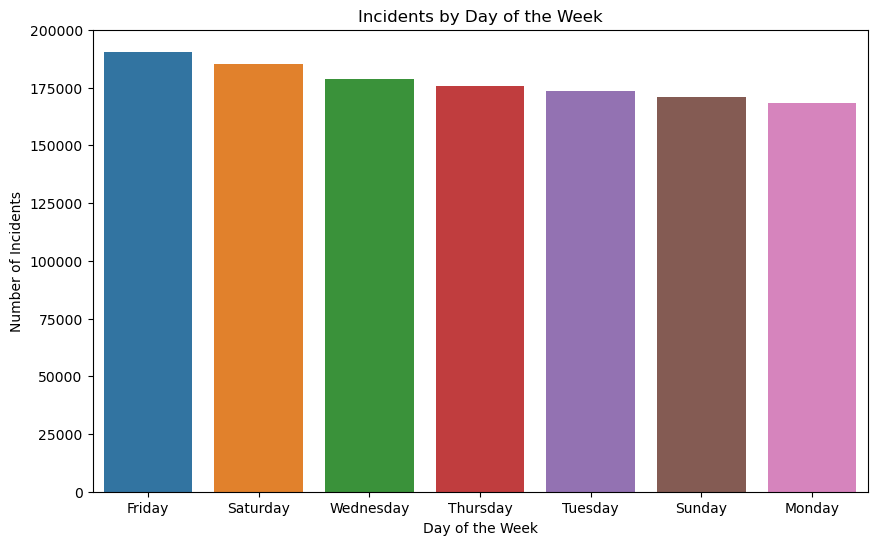

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x=week_day_counts.index, y=week_day_counts.values)
plt.title('Incidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.show()

In [50]:
data['Date'] = pd.to_datetime(data['Date'])
start_date = '2003-01-01'
end_date = '2017-12-31'
df_filtered = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

In [51]:
df_focus = df_filtered[df_filtered['Category'].isin(focuscrimes)]

In [52]:
weekly_crime_data = df_focus.groupby(['Category', 'DayOfWeek']).size().unstack()
weekly_crime_data

DayOfWeek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Category,,,,,,,
ASSAULT,23903,22203,25686,25476,21661,22001,22228
BURGLARY,15172,12706,11610,10463,13155,12797,13068
DISORDERLY CONDUCT,1211,1450,1370,1271,1419,1541,1576
DRIVING UNDER THE INFLUENCE,856,629,1139,1102,682,580,572
DRUG/NARCOTIC,16009,16448,13950,13215,18052,18574,20104
DRUNKENNESS,1414,1176,1823,1878,1133,1087,1165
LARCENY/THEFT,72267,61960,72109,64108,65404,63597,64920
PROSTITUTION,2776,1123,1571,1059,3630,3003,3291
ROBBERY,7655,7608,8074,7820,7405,7407,7448


In [53]:
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_crime_data = weekly_crime_data[sorter]
weekly_crime_data

DayOfWeek,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Category,,,,,,,
ASSAULT,22203,22001,22228,21661,23903,25686,25476
BURGLARY,12706,12797,13068,13155,15172,11610,10463
DISORDERLY CONDUCT,1450,1541,1576,1419,1211,1370,1271
DRIVING UNDER THE INFLUENCE,629,580,572,682,856,1139,1102
DRUG/NARCOTIC,16448,18574,20104,18052,16009,13950,13215
DRUNKENNESS,1176,1087,1165,1133,1414,1823,1878
LARCENY/THEFT,61960,63597,64920,65404,72267,72109,64108
PROSTITUTION,1123,3003,3291,3630,2776,1571,1059
ROBBERY,7608,7407,7448,7405,7655,8074,7820


In [54]:
num_categories = len(focuscrimes)
num_categories

14

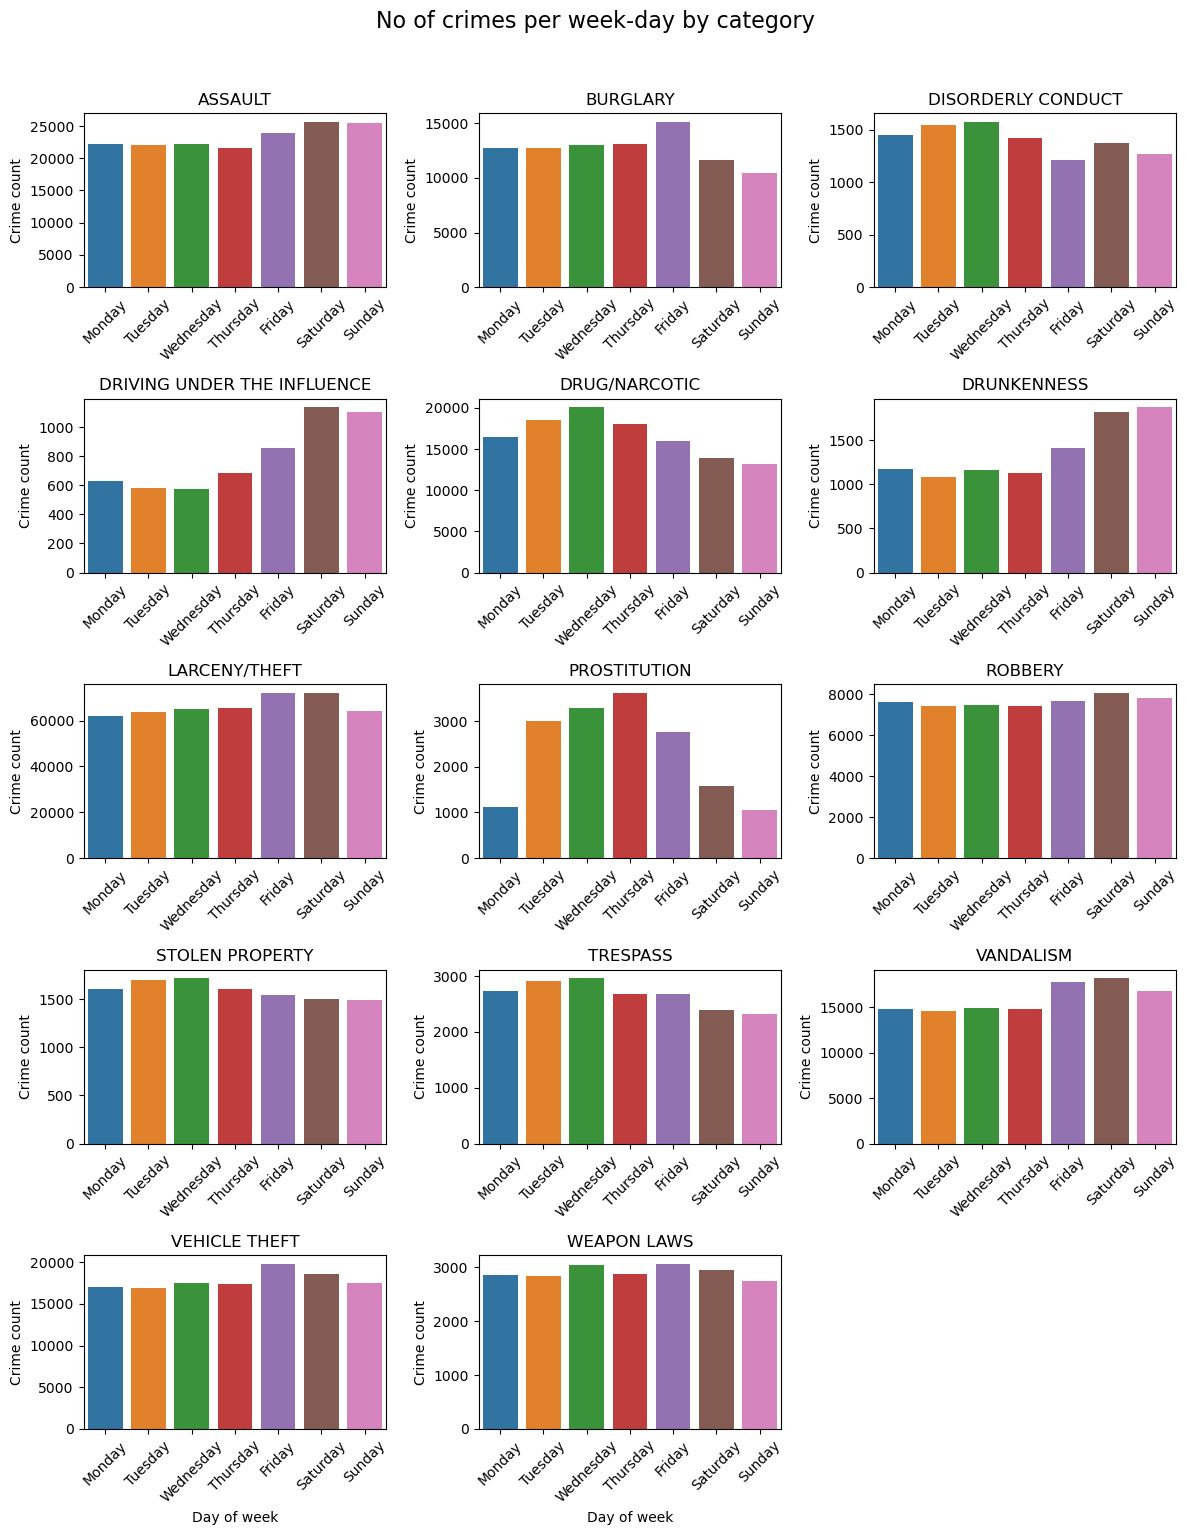

In [55]:

cols = 3 
rows = num_categories // cols + (num_categories % cols > 0)
plt.figure(figsize=(12, 3 * rows))
#plt.figure(figsize=(5 * cols, 4 * rows))
plt.suptitle('No of crimes per week-day by category', fontsize=16, y=1.02)

for i, (category, data) in enumerate(weekly_crime_data.iterrows(), 1):
    ax = plt.subplot(rows, cols, i)
    
    sns.barplot(x=data.index, y=data, ax=ax).set_title(category)
    if i > (rows - 1) * cols:
        plt.xlabel('Day of week')
    else:
        ax.set_xlabel('') 
    plt.ylabel('Crime count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Months plot

In [56]:
filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])
filtered_data['Month'] = filtered_data['Date'].dt.month


In [57]:
month_counts = filtered_data['Month'].value_counts().sort_index()

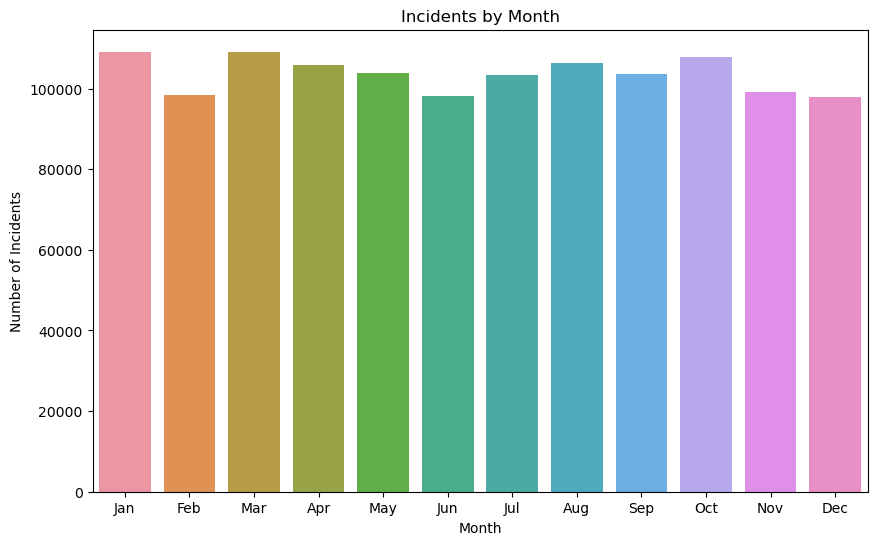

In [58]:
plt.figure(figsize=(10, 6))
sns.barplot(x=month_counts.index, y=month_counts.values)
plt.title('Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [59]:
df_focus['Month'] = df_focus['Date'].dt.month

C:\Users\Hp\AppData\Local\Temp\ipykernel_25744\3654790435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_focus['Month'] = df_focus['Date'].dt.month


In [60]:
monthly_crime_data = df_focus.groupby(['Category', 'Month']).size().unstack()
monthly_crime_data

Month,1,2,3,4,5,6,7,8,9,10,11,12
Category,,,,,,,,,,,,
ASSAULT,13487,12542,14121,13577,13906,13499,13560,13933,14407,14581,13009,12536
BURGLARY,7561,6685,7697,7462,7602,7060,7604,7513,7174,7423,7441,7749
DISORDERLY CONDUCT,871,784,877,798,885,753,791,847,863,841,844,684
DRIVING UNDER THE INFLUENCE,453,483,503,422,508,383,428,471,487,479,479,464
DRUG/NARCOTIC,10937,10356,10831,9665,9789,8636,8994,10099,9684,9973,9195,8193
DRUNKENNESS,827,743,838,783,859,775,785,854,809,908,739,756
LARCENY/THEFT,37800,34067,37853,37146,38402,38023,40762,41501,40136,41581,38424,38670
PROSTITUTION,1622,1419,1301,1490,1359,1201,1246,1299,1528,1353,1366,1269
ROBBERY,4508,3880,4188,4430,4521,4568,4570,4834,4410,4817,4354,4337


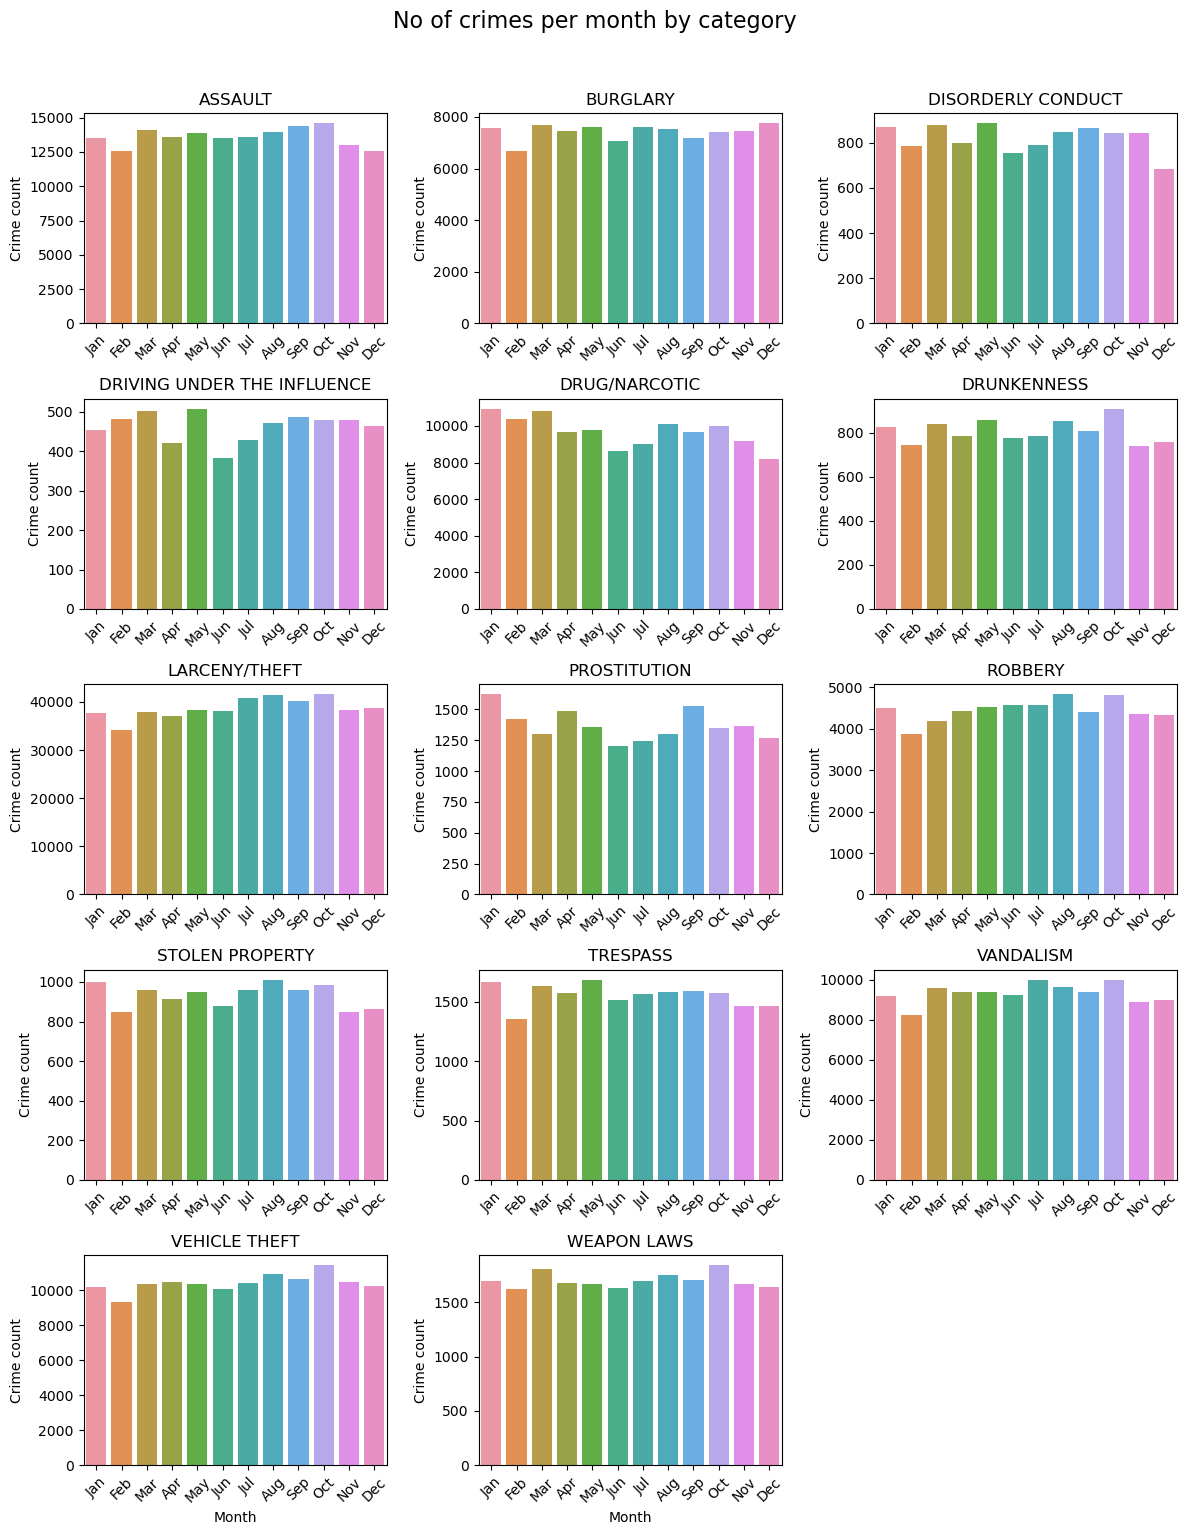

In [62]:
num_categories = len(monthly_crime_data)
cols = 3
rows = num_categories // cols + (num_categories % cols > 0)
plt.figure(figsize=(12, 3 * rows))
plt.suptitle('No of crimes per month by category', fontsize=16, y=1.02)
for i, (category, data) in enumerate(monthly_crime_data.iterrows(), 1):
    ax = plt.subplot(rows, cols, i)
    sns.barplot(x=data.index, y=data, ax=ax).set_title(category)
    if i > (rows - 1) * cols:
        ax.set_xlabel('Month')
    else:
        ax.set_xlabel('') 
    ax.set_ylabel('Crime count')
    # Optional: Set custom x-axis labels to month names or abbreviations
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.show()

In [63]:
filtered_data['Hour'] = pd.to_datetime(filtered_data['Time'], format='%H:%M').dt.hour

In [64]:
hour_counts = filtered_data['Hour'].value_counts().sort_index()

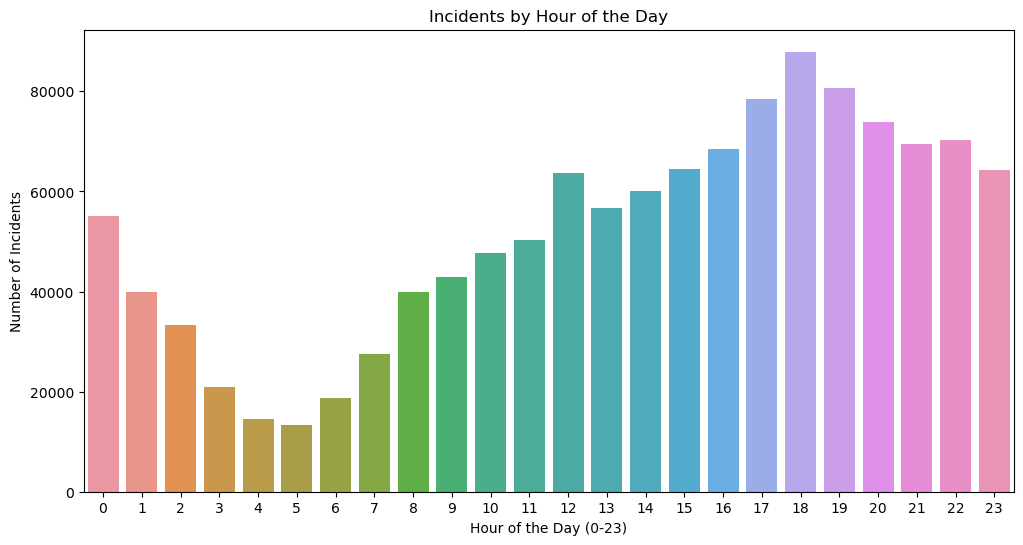

In [65]:
plt.figure(figsize=(12, 6))
sns.barplot(x=hour_counts.index, y=hour_counts.values)
plt.title('Incidents by Hour of the Day')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Number of Incidents')
plt.xticks(range(0, 24))
plt.show()

In [66]:
filtered_data['WeekHour'] = filtered_data['DayOfWeek'] + '_' + filtered_data['Hour'].astype(str)


In [67]:
week_hour_counts = filtered_data['WeekHour'].value_counts().sort_index()

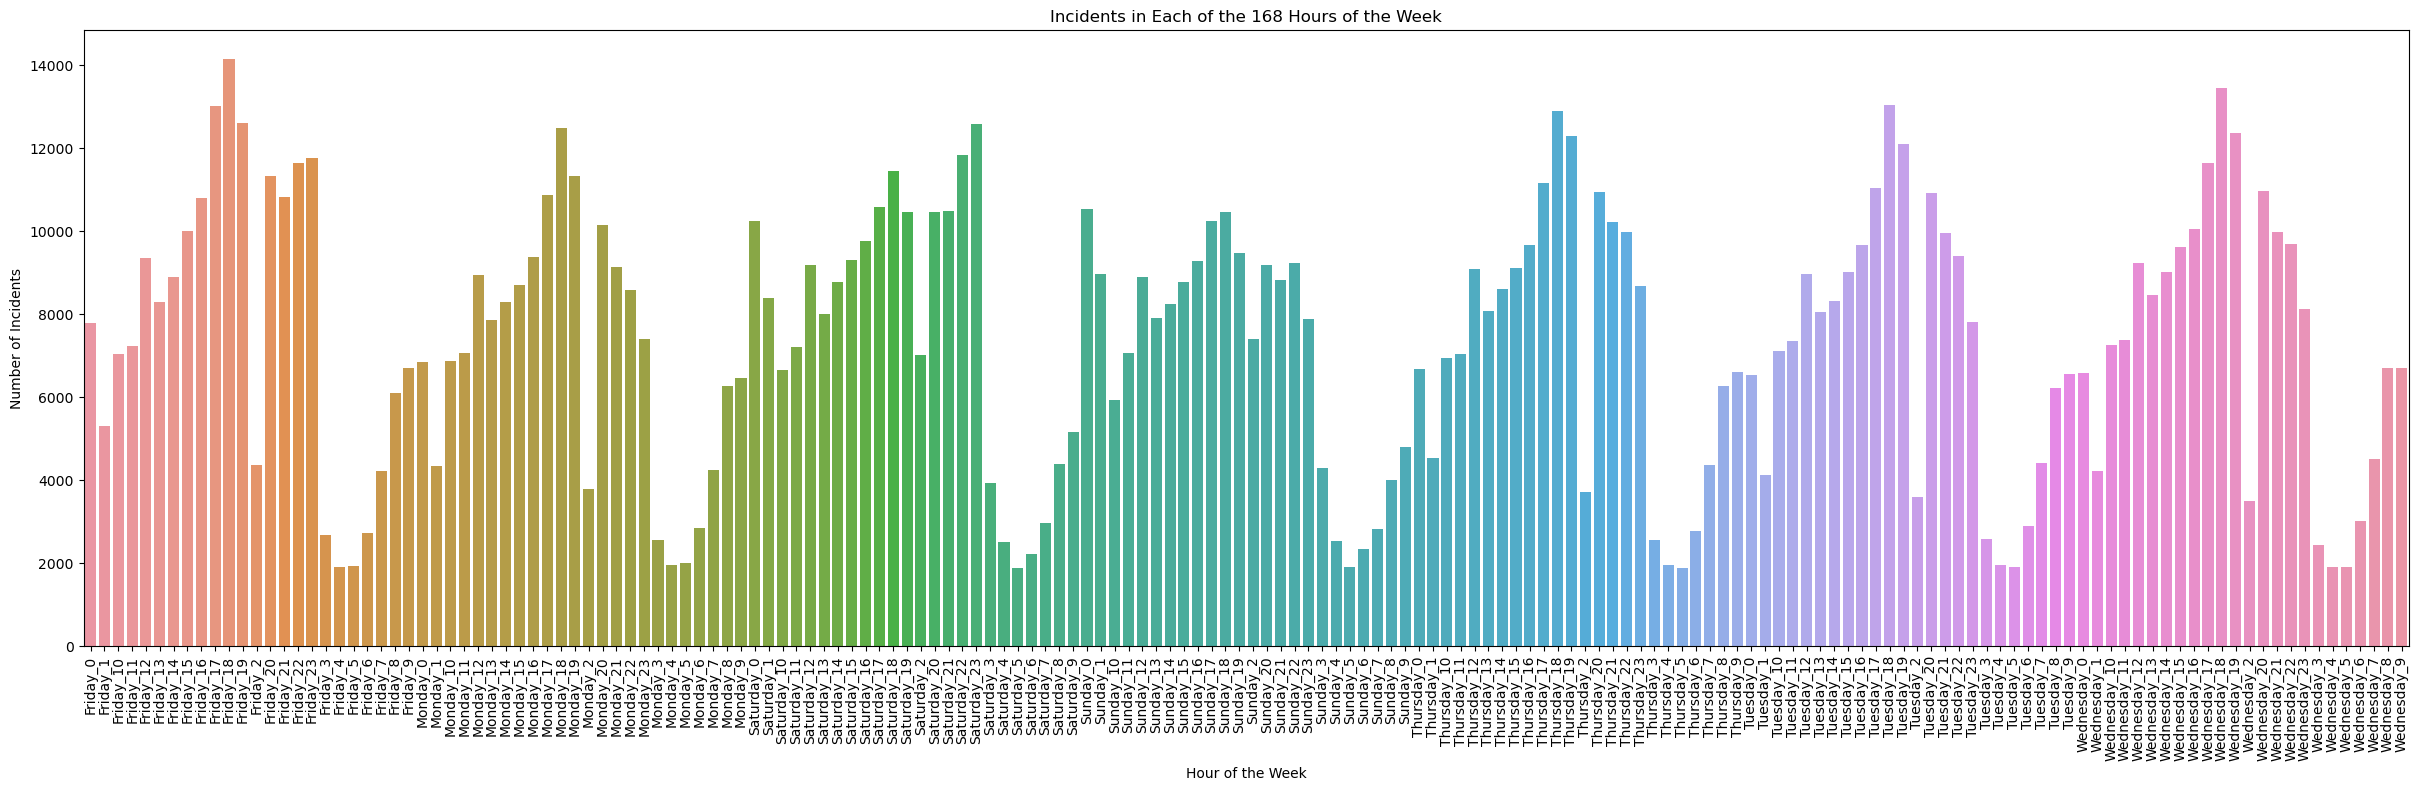

In [68]:
plt.figure(figsize=(30, 8))
sns.barplot(x=week_hour_counts.index, y=week_hour_counts.values)
plt.title('Incidents in Each of the 168 Hours of the Week')
plt.xlabel('Hour of the Week')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility
plt.show()

# BURGLARY calendar plot in the year most incident

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
burglary_data = data[data['Category'] == 'BURGLARY']

# Group by date and count the number of incidents
daily_counts = burglary_data.groupby('Date').size()

# Get the year with the most 'BURGLARY' incidents
year = burglary_data['Date'].dt.year.mode().iloc[0]

# Prepare the data for plotting
# Create a full date range for the year and merge with the daily counts
date_range = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31')
calendar_data = pd.DataFrame(date_range, columns=['Date']).set_index('Date')
calendar_data = calendar_data.join(daily_counts.rename('Incidents')).fillna(0)

# Define a function to plot a month
def plot_month(ax, data, year, month):
    # Find the first day of the month and the number of days in the month
    first_day = datetime(year, month, 1)
    n_days = calendar.monthrange(year, month)[1]

    # Create an array representing the month's layout
    month_array = np.zeros((6, 7))
    month_array.fill(np.nan)

    # Fill the array with the incident counts
    for day in range(n_days):
        d = first_day + pd.Timedelta(days=day)
        week_of_month = d.day // 7
        day_of_week = d.weekday()
        month_array[week_of_month, day_of_week] = data.get(d, 0)

    # Plot the month
    sns.heatmap(month_array, annot=True, fmt=".0f", cmap="Reds", cbar=False, ax=ax, linewidths=.5)
    ax.set_title(calendar.month_name[month])
    ax.axis('off')

# Plot each month in a separate subplot
fig, axes = plt.subplots(4, 3, figsize=(12, 12))
for i, ax in enumerate(axes.flatten()):
    plot_month(ax, calendar_data['Incidents'], year, i+1)

# Add a color bar to the figure


fig.suptitle(f'Calendar Heatmap of BURGLARY Incidents in {year}', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])

plt.tight_layout()
plt.show()

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
burglary_data = data[data['Category'] == 'ROBBERY']

# Group by date and count the number of incidents
daily_counts = burglary_data.groupby('Date').size()

# Get the year with the most 'BURGLARY' incidents
year = burglary_data['Date'].dt.year.mode().iloc[0]

# Prepare the data for plotting
# Create a full date range for the year and merge with the daily counts
date_range = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31')
calendar_data = pd.DataFrame(date_range, columns=['Date']).set_index('Date')
calendar_data = calendar_data.join(daily_counts.rename('Incidents')).fillna(0)

# Define a function to plot a month
def plot_month(ax, data, year, month):
    # Find the first day of the month and the number of days in the month
    first_day = datetime(year, month, 1)
    n_days = calendar.monthrange(year, month)[1]

    # Create an array representing the month's layout
    month_array = np.zeros((6, 7))
    month_array.fill(np.nan)

    # Fill the array with the incident counts
    for day in range(n_days):
        d = first_day + pd.Timedelta(days=day)
        week_of_month = d.day // 7
        day_of_week = d.weekday()
        month_array[week_of_month, day_of_week] = data.get(d, 0)

    # Plot the month
    sns.heatmap(month_array, annot=True, fmt=".0f", cmap="Reds", cbar=False, ax=ax, linewidths=.5)
    ax.set_title(calendar.month_name[month])
    ax.axis('off')

# Plot each month in a separate subplot
fig, axes = plt.subplots(4, 3, figsize=(12, 12))
for i, ax in enumerate(axes.flatten()):
    plot_month(ax, calendar_data['Incidents'], year, i+1)

# Add a color bar to the figure


fig.suptitle(f'Calendar Heatmap of ROBBERY Incidents in {year}', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])

plt.tight_layout()
plt.show()

In [ ]:
choose a different crime type and create a polar plot of its 24hour cycle 

In [ ]:
# Convert 'Time' to datetime and extract the hour
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M')
data['Hour'] = data['Time'].dt.hour

# Filter for 'ASSAULT' incidents
assault_data = data[data['Category'] == 'ASSAULT']

# Group by hour and count the number of incidents
hourly_counts = assault_data.groupby('Hour').size()

# Prepare data for polar plot
# There are 24 hours, so we create an array with 24 angles between 0 and 2*pi
theta = np.linspace(0, 2 * np.pi, 24, endpoint=False)

# The radius (distance from the center) will be the number of incidents
radii = hourly_counts.reindex(np.arange(24), fill_value=0)

# Create the polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

# Make the plot circular
ax.set_theta_zero_location('N')  # Set the zero angle (midnight) to the top of the plot
ax.set_theta_direction(-1)  # Set the angle to increase clockwise

# Plot the data
bars = ax.bar(theta, radii, width=0.3, bottom=0.0)

# Use a different color for each bar based on its height
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.viridis(r / max(radii)))
    bar.set_alpha(0.5)

# Set the ticks for the hours
ax.set_xticks(theta)
ax.set_xticklabels([f'{i}:00' for i in range(24)], fontsize=10)

# Add labels and title
ax.set_title('24-hour Cycle of ASSAULT Incidents', va='bottom', fontsize=15)

plt.show()


# FOr part 3
***********
****************************
***************************************

In [ ]:
import pandas as pd
import geopandas as gpd
import json
import plotly.express as px


# Load the GeoJSON file
geojson_file_path = 'https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson'  # Replace with your file path
gdf = gpd.read_file(geojson_file_path)



In [ ]:
# Filter for incidents related to vehicle safety on Sundays
vehicle_related_categories = ['VEHICLE THEFT', 'STOLEN AUTOMOBILE']
sunday_vehicle_incidents = data[(data['Category'].isin(vehicle_related_categories)) & (data['DayOfWeek'] == 'Sunday')]

In [ ]:
# Count incidents in each police district
district_incident_counts = sunday_vehicle_incidents['PdDistrict'].value_counts()


In [ ]:
# Convert this to a DataFrame for easier merging
district_incident_counts_df = district_incident_counts.reset_index()
district_incident_counts_df.columns = ['DISTRICT', 'IncidentCount']

In [ ]:
# Merge with the GeoDataFrame
gdf_merged = gdf.merge(district_incident_counts_df, on='DISTRICT', how='left')


In [ ]:
# Replace NaN with 0 for districts with no incidents
gdf_merged['IncidentCount'].fillna(0, inplace=True)

In [ ]:
 #Convert GeoDataFrame to JSON
geojson_data = json.loads(gdf_merged.to_json())

In [ ]:
fig = px.choropleth_mapbox(gdf_merged, 
                           geojson=geojson_data, 
                           locations='DISTRICT', 
                           featureidkey="properties.DISTRICT",  # This line is crucial
                           color='IncidentCount',
                           color_continuous_scale="Viridis",
                           range_color=(0, gdf_merged['IncidentCount'].max()),
                           mapbox_style="carto-positron",
                           zoom=10, 
                           center = {"lat": 37.7749, "lon": -122.4194},
                           opacity=0.5,
                           labels={'IncidentCount':'Vehicle-Related Incidents'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


In [ ]:
gdf_merged

In [ ]:
sunday_vehicle_incidents